In [ ]:
!pip install xlrd
!pip install openpyxl

In [78]:
import pandas as pd

archivo = '/content/sample_data/Ventas_Videojuegos.xlsx'
df = pd.read_excel(archivo)

bins = [1980, 1990, 2000, 2010, 2020]
labels = ['1980', '1990', '2000', '2010']
df['Decada'] = pd.cut(df['Año'], bins=bins, labels=labels, right=False)


In [77]:
columns = ['Decada','Plataforma','Genero','Ventas NA','Ventas EU','Ventas JP','Ventas Otros']
df2 = df[columns]
dFinal = df2.groupby(['Decada','Genero']).sum()

<ipython-input-77-d7972d4bf841>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dFinal = df2.groupby(['Decada','Genero']).sum()


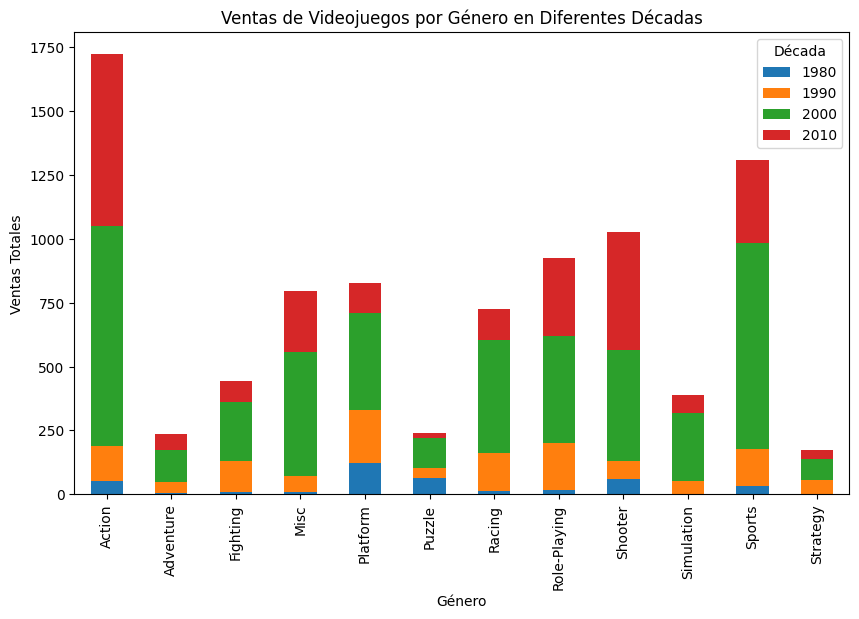

In [76]:
import matplotlib.pyplot as plt

decadas_unicas = dFinal.index.get_level_values('Decada').unique()

fig, ax = plt.subplots(figsize=(10, 6))

ventas_apiladas = pd.DataFrame()

for decada in decadas_unicas:
    decada_data = dFinal.xs(key=decada, level='Decada')

    ventas_apiladas[decada] = decada_data.sum(axis=1)

ventas_apiladas.plot(kind='bar', stacked=True, ax=ax)

plt.title('Ventas de Videojuegos por Género en Diferentes Décadas')
plt.xlabel('Género')
plt.ylabel('Ventas Totales')
plt.legend(title='Década')
plt.show()


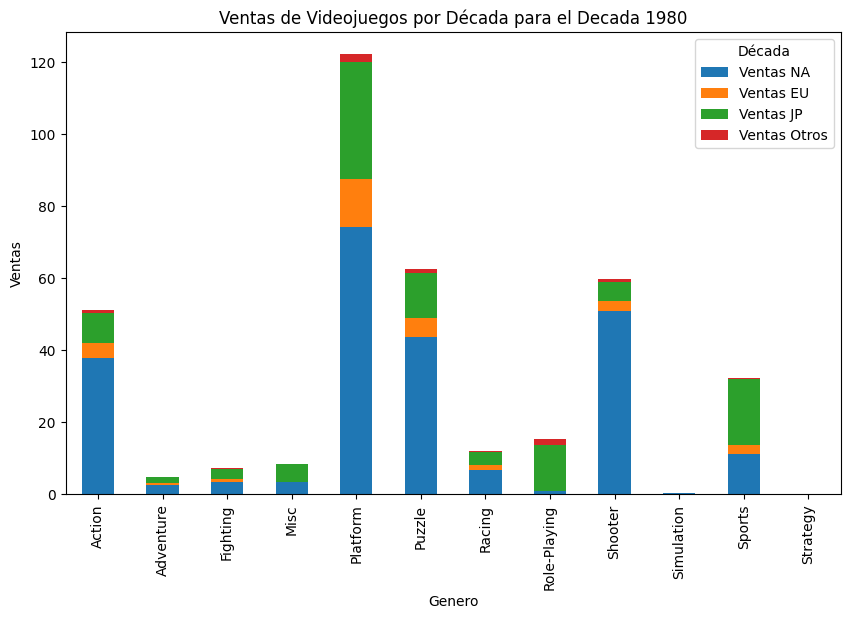

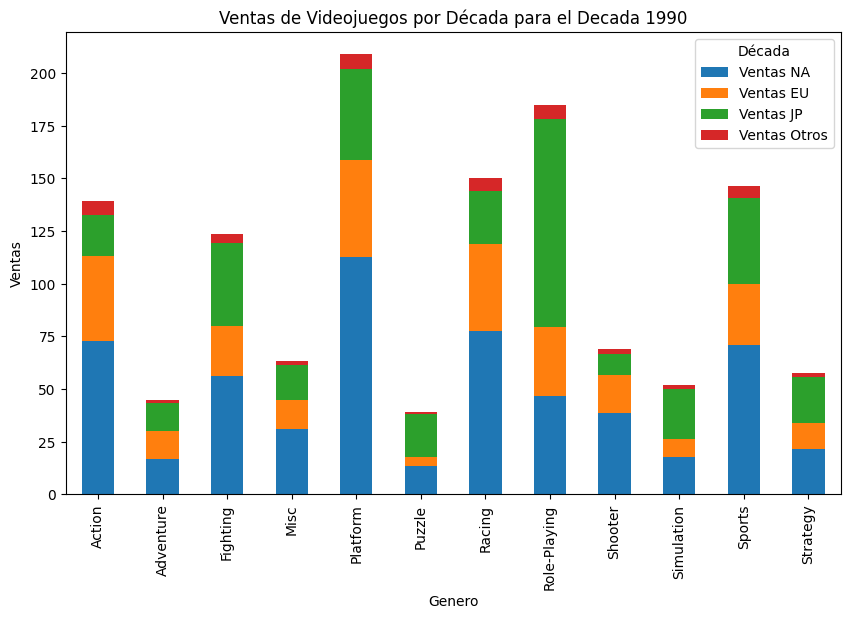

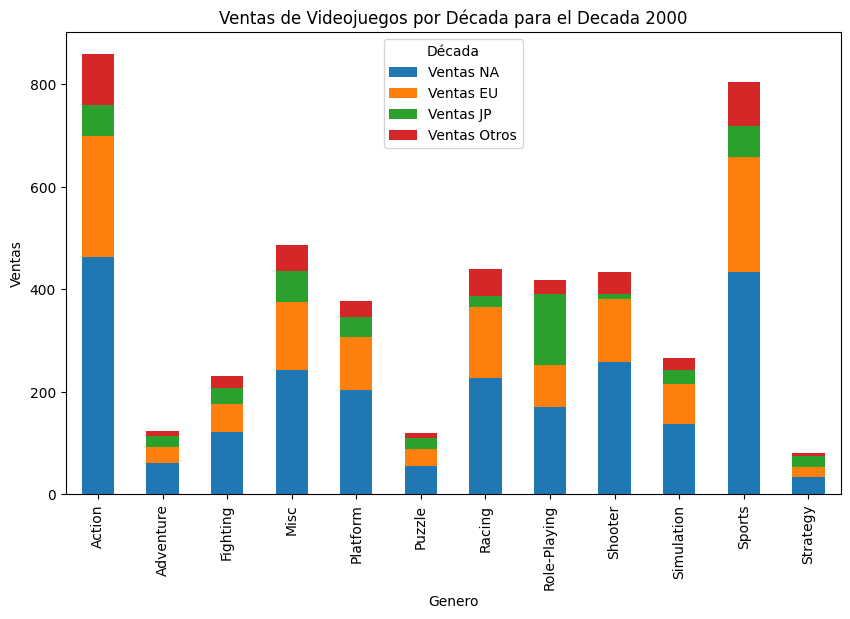

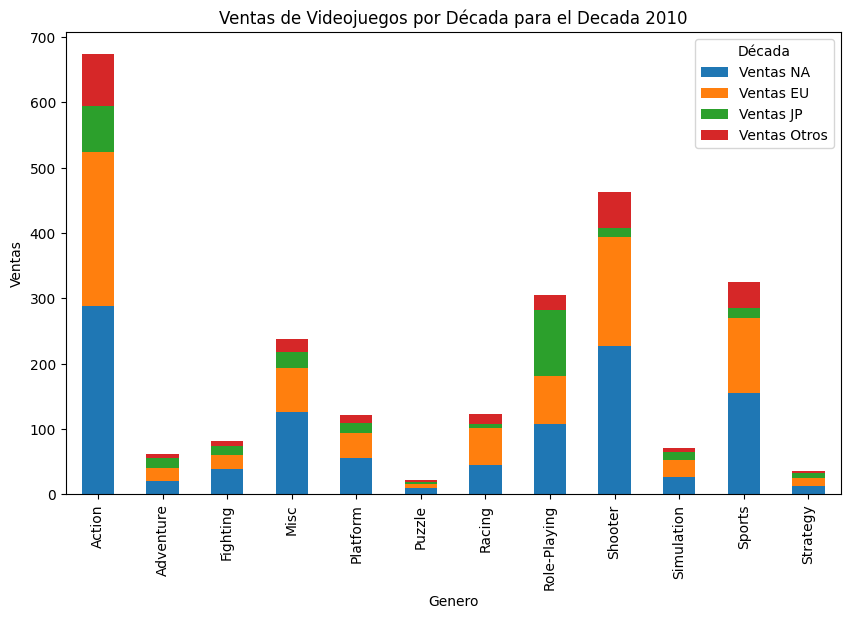

In [45]:
import matplotlib.pyplot as plt

decadas_unicas = dFinal.index.get_level_values('Decada').unique()

for decada in decadas_unicas:
    decada_data = dFinal.xs(key=decada, level='Decada')

    decada_data.plot(kind='bar', stacked=True, figsize=(10, 6))

    plt.title(f'Ventas de Videojuegos por Década para el Decada {decada}')
    plt.xlabel('Genero')
    plt.ylabel('Ventas')
    plt.legend(title='Década')

    plt.show()


<ipython-input-81-bd8b013663d1>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dPlataform = df3.groupby(['Decada','Plataforma']).sum()


                   Ventas NA  Ventas EU  Ventas JP  Ventas Otros
Decada Plataforma                                               
1980   2600            80.78       4.86       0.00          0.84
       3DO              0.00       0.00       0.00          0.00
       3DS              0.00       0.00       0.00          0.00
       DC               0.00       0.00       0.00          0.00
       DS               0.00       0.00       0.02          0.00
...                      ...        ...        ...           ...
2010   Wii            126.51      69.14      17.75         18.85
       WiiU            38.32      24.23      12.79          6.45
       X360           332.92     171.25       5.46         47.06
       XB               0.00       0.00       0.00          0.00
       XOne            83.19      45.65       0.34         11.92

[124 rows x 4 columns]


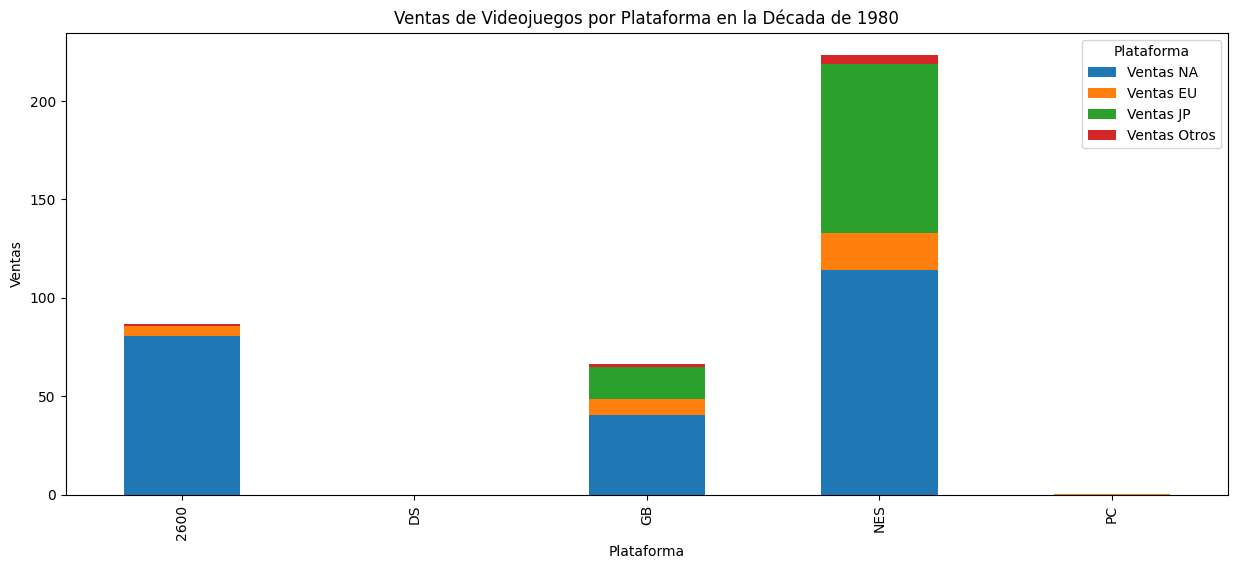

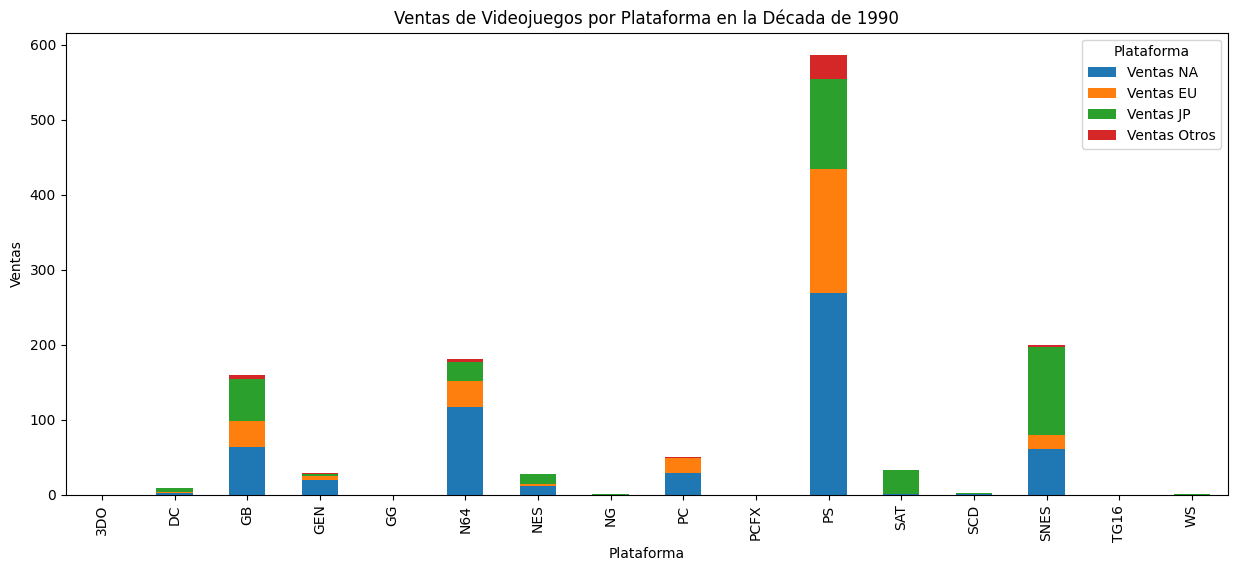

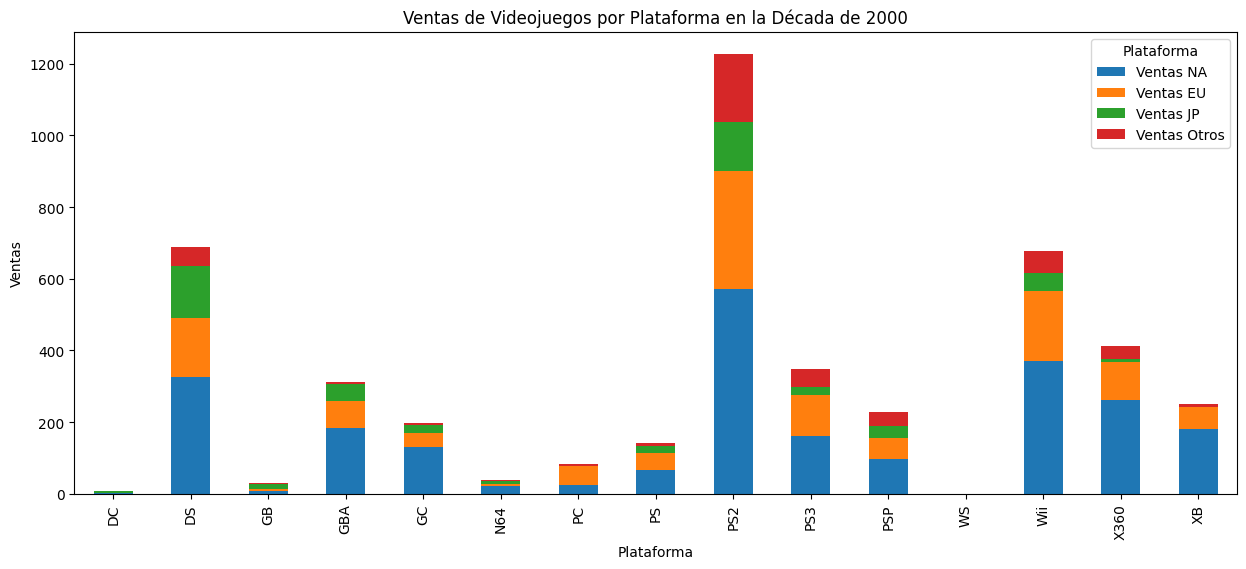

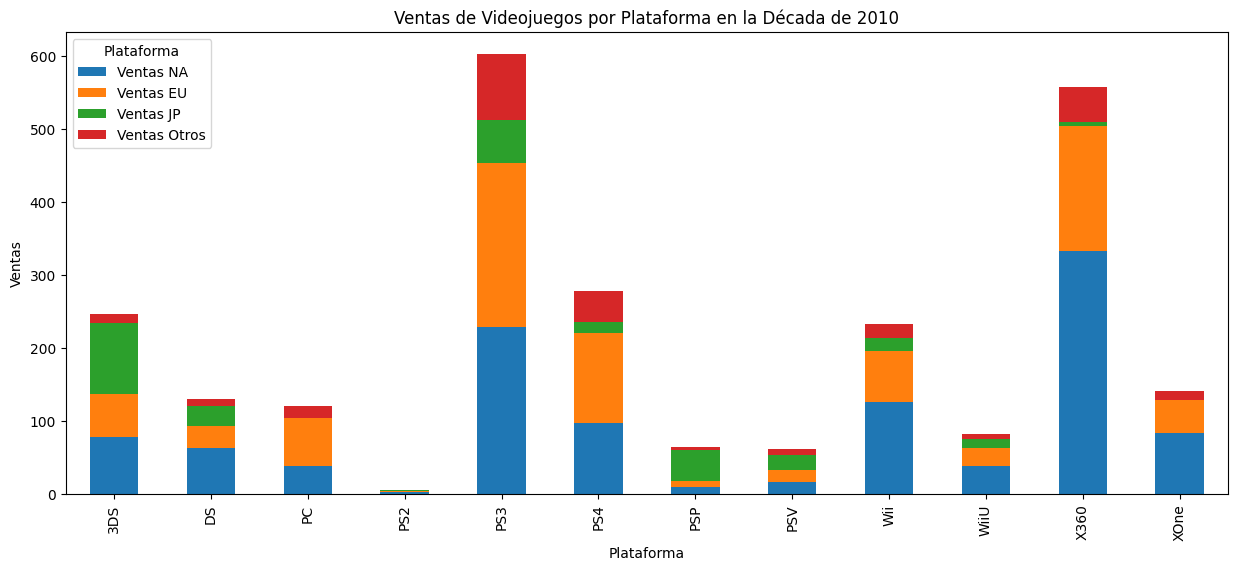

In [81]:
columns = ['Decada','Plataforma','Genero','Ventas NA','Ventas EU','Ventas JP','Ventas Otros']
df3 = df[columns]
dPlataform = df3.groupby(['Decada','Plataforma']).sum()
print(dPlataform)

decadas_unicas = dPlataform.index.get_level_values('Decada').unique()

for decada in decadas_unicas:
    decada_data = dPlataform.xs(key=decada, level='Decada')
    decada_data = decada_data.loc[decada_data.sum(axis=1) > 0]

    if not decada_data.empty:
        decada_data.plot(kind='bar', stacked=True, figsize=(15, 6))

        plt.title(f'Ventas de Videojuegos por Plataforma en la Década de {decada}')
        plt.xlabel('Plataforma')
        plt.ylabel('Ventas')
        plt.legend(title='Plataforma')

        plt.show()

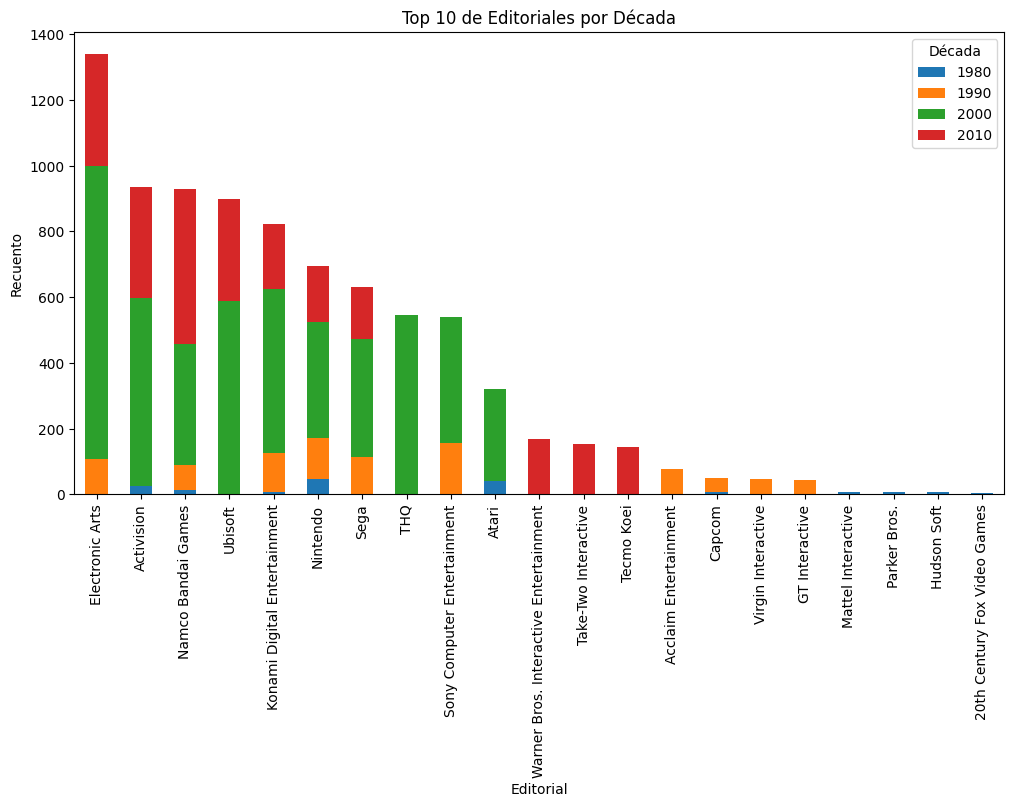

In [70]:
editorial = df.groupby(['Decada'])['Editorial'].value_counts()
top10 = editorial.groupby('Decada').head(10)
top10 = top10.unstack(level='Decada')
editorial_totals = top10.sum(axis=1)

top10 = top10.loc[editorial_totals.sort_values(ascending=False).index]
top10.plot(kind='bar', figsize=(12, 6), stacked=True)
plt.title('Top 10 de Editoriales por Década')
plt.xlabel('Editorial')
plt.ylabel('Recuento')
plt.legend(title='Década')
plt.show()